# RGB TO Greyscale

(225, 225, 3)
(225, 225)
(225, 225)


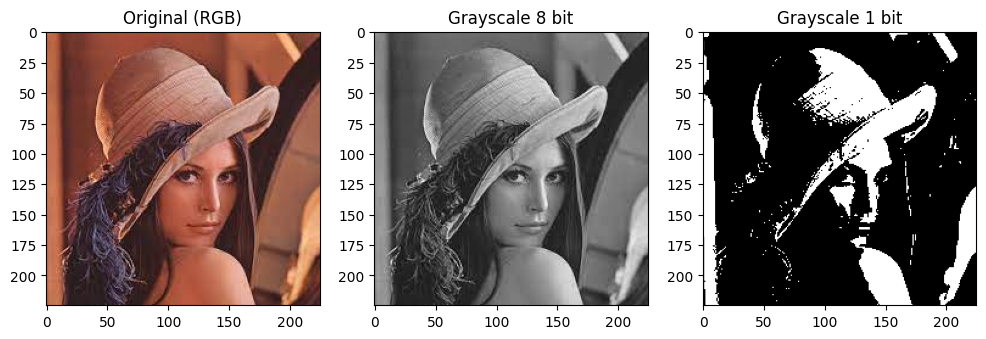

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('bahan/lenna.jpg')  # Ganti 'your_image.jpg' dengan nama gambar Anda
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Reduce to 1-bit grayscale (black and white)
gray_1bit = np.where(gray > 127, 255, 0).astype(np.uint8)  # Threshold at 127
print(image.shape)
print(gray.shape)
print(gray_1bit.shape)


# Plot RGB to Grayscale
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original (RGB)')
plt.subplot(132)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale 8 bit')
plt.subplot(133)
plt.imshow(gray_1bit, cmap='gray')
plt.title('Grayscale 1 bit')
plt.show()



# Invert

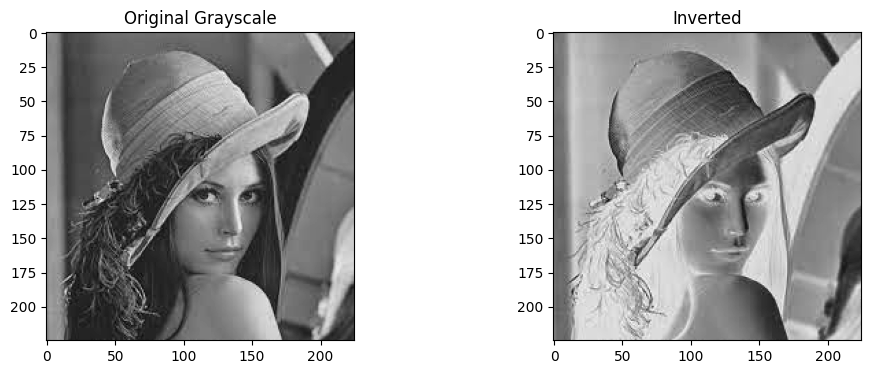

In [11]:

# Invert grayscale image
inverted = 255 - gray

# Plot Inverted Image
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.subplot(122)
plt.imshow(inverted, cmap='gray')
plt.title('Inverted')
plt.show()

# Brightness

233 3


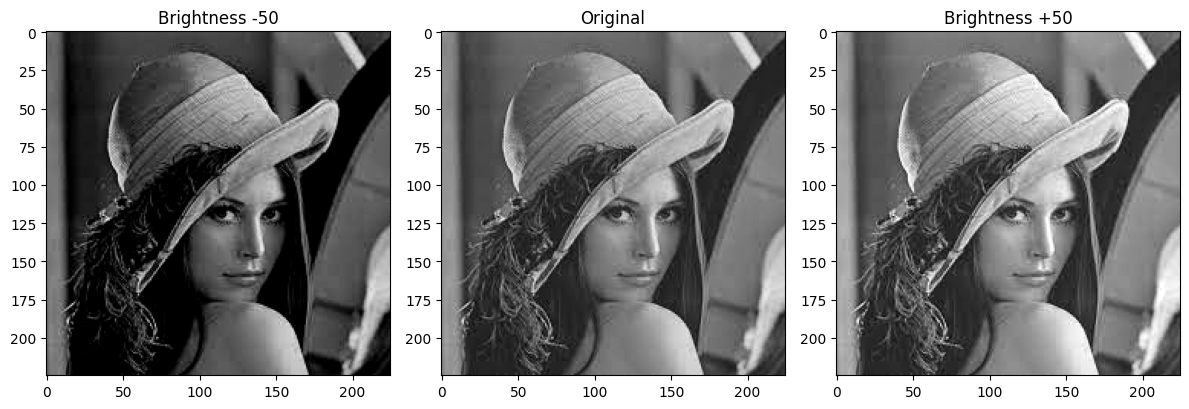

In [12]:
# 1. Brightness Adjustment
print(np.max(gray) , np.min(gray))
# Brightness +50
bright_plus = np.clip(gray + 50.0 , 0, 255).astype(np.uint8)
# Brightness -50
bright_minus = np.clip(gray + (-50.0), 0, 255).astype(np.uint8)

# Plot Brightness +50
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(bright_minus, cmap='gray')
plt.title('Brightness -50')
plt.subplot(132)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.subplot(133)
plt.imshow(bright_plus, cmap='gray')
plt.title('Brightness +50')
plt.tight_layout() 
plt.show()

In [4]:
gray

array([[139, 138, 136, ...,  96,  94,  95],
       [138, 137, 135, ...,  98,  96,  95],
       [136, 135, 133, ..., 101, 100,  97],
       ...,
       [112, 122, 133, ...,  45,  51,  50],
       [112, 122, 133, ...,  45,  53,  51],
       [108, 118, 131, ...,  46,  49,  51]], dtype=uint8)

In [5]:
bright_plus

array([[189, 188, 186, ..., 146, 144, 145],
       [188, 187, 185, ..., 148, 146, 145],
       [186, 185, 183, ..., 151, 150, 147],
       ...,
       [162, 172, 183, ...,  95, 101, 100],
       [162, 172, 183, ...,  95, 103, 101],
       [158, 168, 181, ...,  96,  99, 101]], dtype=uint8)

In [6]:
bright_minus

array([[89, 88, 86, ..., 46, 44, 45],
       [88, 87, 85, ..., 48, 46, 45],
       [86, 85, 83, ..., 51, 50, 47],
       ...,
       [62, 72, 83, ...,  0,  1,  0],
       [62, 72, 83, ...,  0,  3,  1],
       [58, 68, 81, ...,  0,  0,  1]], dtype=uint8)

# Contrast

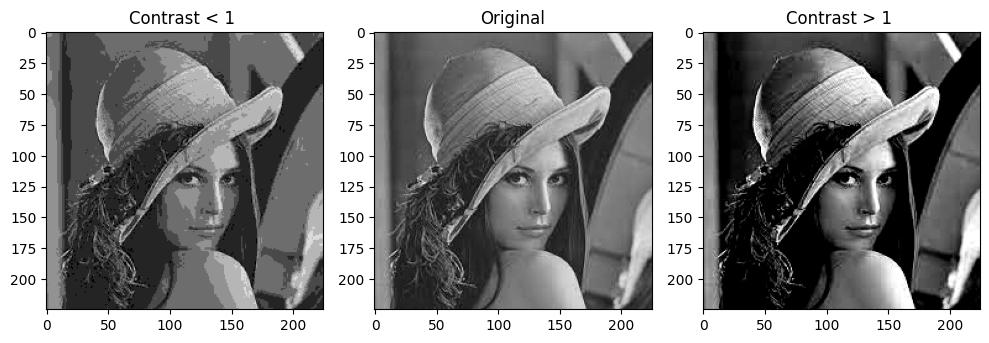

In [7]:
# Define parameters
P = 128.0  # Titik tengah greyscale 256/2

# Apply contrast enhancement
def contrast_enhancement(image, G, P):
  enhanced_image = np.clip(G * (image - P) + P, 0, 255).astype(np.uint8)
  return enhanced_image
    
enhanced_image1 = contrast_enhancement(gray, G=0.03, P=128.0)
enhanced_image2 = contrast_enhancement(gray, G=2.0, P=128.0)

# Display the original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(enhanced_image1, cmap='gray')
plt.title('Contrast < 1 ')

plt.subplot(132)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(133)
plt.imshow(enhanced_image2, cmap='gray')
plt.title('Contrast > 1 ')

plt.tight_layout()
plt.show()

# 3. Gamma Correction

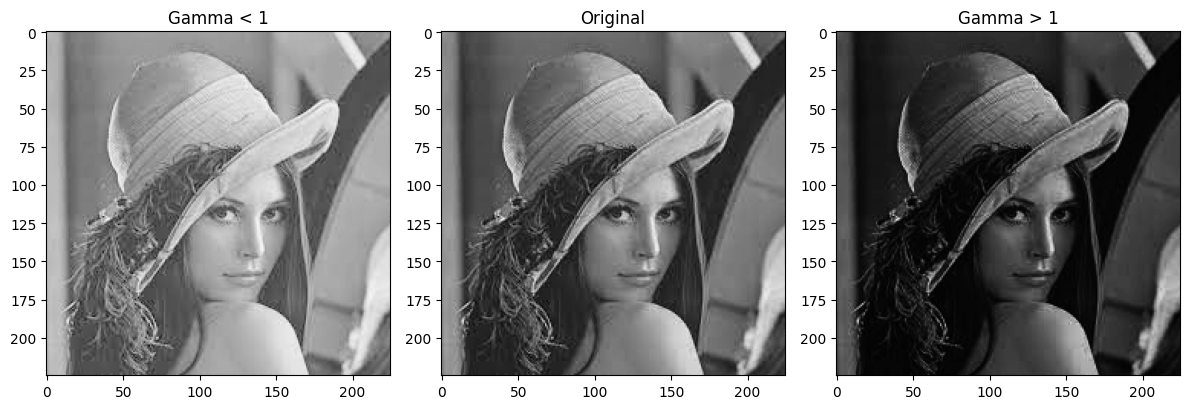

In [8]:
# Gamma 2.0
gamma_2 = np.power(gray / 255.0, 2.0) * 255.0
gamma_2 = gamma_2.astype(np.uint8)


# Gamma 0.5
gamma_05 = np.power(gray / 255.0, 0.5) * 255.0
gamma_05 = gamma_05.astype(np.uint8)

# Plot Gamma 1
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(gamma_05, cmap='gray')
plt.title('Gamma < 1')
plt.subplot(132)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.subplot(133)
plt.imshow(gamma_2, cmap='gray')
plt.title('Gamma > 1')
plt.tight_layout() 
plt.show()



# Histogram citra

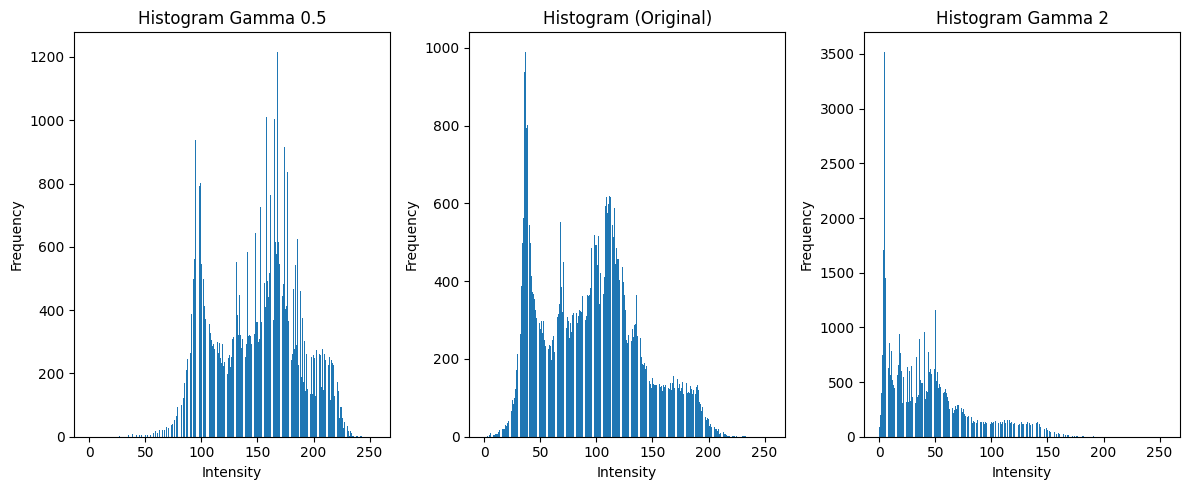

In [9]:
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_1 = cv2.calcHist([gamma_05], [0], None, [256], [0, 256])
hist_2 = cv2.calcHist([gamma_2], [0], None, [256], [0, 256])

# Plot histograms using bar charts
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.bar(np.arange(256), hist_1.flatten())
plt.title('Histogram Gamma 0.5')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(132)
plt.bar(np.arange(256), hist_gray.flatten())
plt.title('Histogram (Original)')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(133)
plt.bar(np.arange(256), hist_2.flatten())
plt.title('Histogram Gamma 2')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

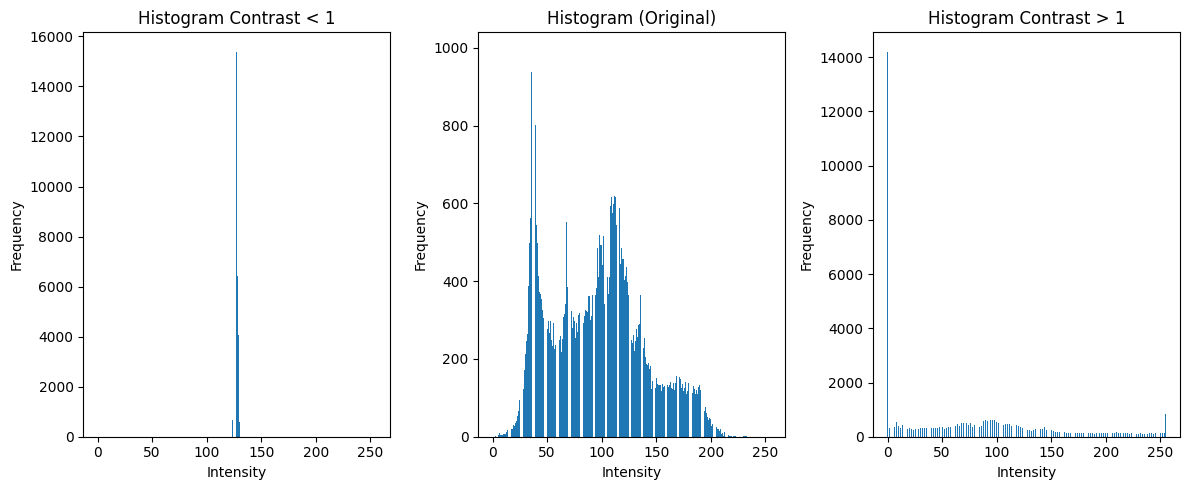

In [13]:
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_1 = cv2.calcHist([enhanced_image1], [0], None, [256], [0, 256])
hist_2 = cv2.calcHist([enhanced_image2], [0], None, [256], [0, 256])

# Plot histograms using bar charts
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.bar(np.arange(256), hist_1.flatten())
plt.title('Histogram Contrast < 1')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(132)
plt.bar(np.arange(256), hist_gray.flatten())
plt.title('Histogram (Original)')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(133)
plt.bar(np.arange(256), hist_2.flatten())
plt.title('Histogram Contrast > 1')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()